1. Parametrization and fitting to a second-order polynomial $a+bx+cx^2$

In [64]:
import numpy as np
import matplotlib.pyplot as plt

#Given data
x = np.random.rand(100,1)
y = 2.0+5*x*x+0.1*np.random.randn(100,1)

#Define the dim of the design matrix X -- Second order polynomial fit
X = np.ones((len(x), 3))

#Fill the matrix elements
X[:,0] = 1.0
X[:,1] = x.flatten()
X[:,2] = (x**2).flatten()

#Define optimal parameters from analytical expressions
betas = (np.linalg.inv(X.T @ X) @ X.T ) @ y

#Print the polynomial coefficients
print("The optimal values are [a b c]:", betas.flatten())

#Define predicted outputs
y_tilde = X @ betas

The optimal values are [a b c]: [2.01225574 0.05194989 4.88933716]


2. Second-order polynomial fit using Scikit Learn

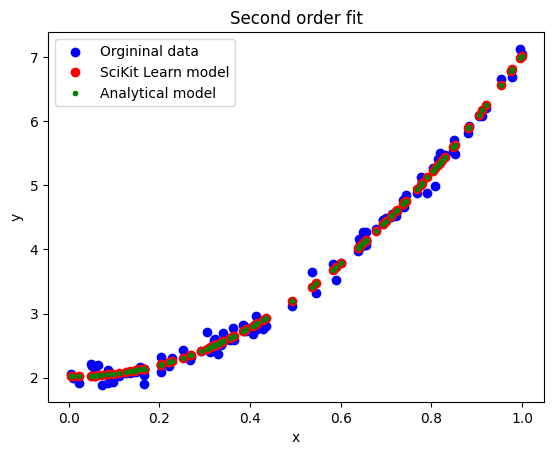

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Define the second order polynomial
n = 2
poly = PolynomialFeatures(degree=n)

#Generate polinomial features
X = poly.fit_transform(x)

#Fit the model with data
model = LinearRegression()
model.fit(X, y)

#Make predictions
y_pred = model.predict(X)


#Plotting
plt.scatter(x, y, color='blue', label='Orgininal data')
plt.plot(x, y_pred, "ro", ms=6, label='SciKit Learn model')
plt.plot(x, y_tilde, "go", ms=3, label="Analytical model")
plt.title("Second order fit")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


As we can see on the plot, the Scikit fit and the analytical model predict the same values and fit well to the original data.

3. Compute the mean square error and $R^2$ score

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

#Define my own MSE and R2 metrics

def MSE(y_true, y_pred):
  return np.mean((y_true-y_pred)**2)

def R2(y_true, y_pred):
  return 1 - np.sum((y_true-y_pred)**2)/np.sum((y_true-np.mean(y_true))**2)

#Own results
MSE_own = MSE(y, y_pred)
R2_own = R2(y, y_pred)

#Sklearn metrics
MSE_sk = mean_squared_error(y, y_pred)
R2_sk = r2_score(y, y_pred)

print(f"My  own metrics: MSE: {MSE_own} | R^2: {R2_own}")
print(f"Sklearn metrics: MSE: {MSE_sk} | R^2: {R2_sk}")

My  own metrics: MSE: 0.010664321831804628 | R^2: 0.9951338722214245
Sklearn metrics: MSE: 0.010664321831804628 | R^2: 0.9951338722214245


In order to see the impact of the noise parameter on the quality of the fits, it was proposed a function to create a dataset as a function of the noise parameter $\epsilon$ and compute their MSE and $R^2$ scores.

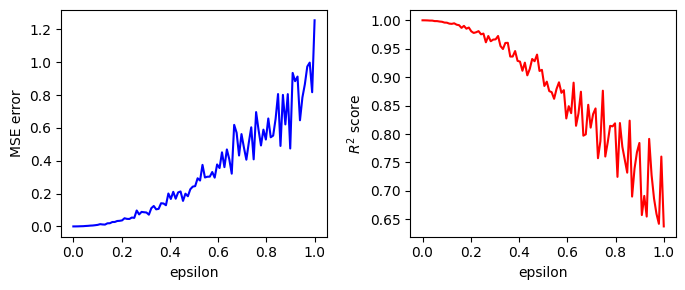

In [61]:
#Defined dataset as a function of the noise parameter

def dataset(epsilon):
  x = np.random.rand(100,1)
  y = 2.0 + 5*x*x + epsilon*np.random.randn(100,1)
  return x, y

#Define several noise sources
noise = np.linspace(0, 1, 100)

#Calculate MSE and R2 for all of those datasets
MSE_vals = []
R2_vals = []


#Using the analytical expressions as before
for e in noise:

  x, y = dataset(e)
  X = np.ones((len(x), 3))

  #Fill the matrix elements
  X[:,0] = 1.0
  X[:,1] = x.flatten()
  X[:,2] = (x**2).flatten()

  #Define optimal parameters from analytical expressions
  betas = (np.linalg.inv(X.T @ X) @ X.T ) @ y

  #Define predicted outputs
  y_tilde = X @ betas

  MSE_vals.append(MSE(y, y_tilde))
  R2_vals.append(R2(y, y_tilde))

#Plot the square error and R2 score as a function of epsilon
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(7, 3))

#Plot MSE
ax1.plot(noise, MSE_vals, color='blue')
ax1.set_xlabel('epsilon')
ax1.set_ylabel('MSE error')

#Plot R2
ax2.plot(noise, R2_vals, color='red')
ax2.set_xlabel('epsilon')
ax2.set_ylabel(r'$R^2$ score')

plt.tight_layout()
plt.show()



As we could expect, for $\epsilon=0$ the fit is perfect with zero MSE and $R^2=1$ and we can retrieve the same parameters as the function. For bigger values of $ϵ$ the error increases.

## Refs

For the first part of the code, the same line of work was followed as presented in the lecture notes https://compphysics.github.io/MachineLearning/doc/pub/week35/ipynb/week35.ipynb

For the second part, chapter *3.3 Simple linear regression model using scikit-learn* of the lecture notes https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html was followed.

Finally for computing square errors, R^2 scores and other metrics, the Scikit Learn documentation was used. https://scikit-learn.org/stable/api/sklearn.metrics.html